# Aprendizaje No Supervisado

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [6]:
data = pd.read_excel("../Datasets/HVAC.xlsx", "HISTORICO_DATOS", index_col=0)

In [7]:
data2 = data
variables_a_eliminar = ['POTENCIA BOMBA CALOR FELIPE','POTENCIA BOMBA CALOR CARLOS',
                        'POTENCIA GRUPO FRÍO 1','POTENCIA GRUPO FRÍO 2'
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [8]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

## Método Codo

In [9]:
def metodoCodo(X):
    from sklearn.cluster import KMeans
    plt.figure(figsize=(10, 8))
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [10]:
dataLimpia = pd.read_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)

## Potencia Carlos

Datos sin limpiar de Carlos

In [11]:
dataCarlos = data3[['TEMPERATURA SALIDA BOMBA CALOR CARLOS','POTENCIA TERMICA BOMBA CALOR CARLOS', 
                    'C_O_P BOMBA CALOR CARLOS', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
                    'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS']]
dataCarlos.describe()

,TEMPERATURA SALIDA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,C_O_P BOMBA CALOR CARLOS,POTENCIA TRAFO 4,POTENCIA TRAFO 5,TEMPERATURA EXTERIOR,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,29.447289,132.154739,1.603675,318.143167,348.748790,15.083257,22.312328
std,13.676912,149.917857,2.059181,109.800553,173.801800,11.345877,5.375236
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000,0.000000
25%,16.940001,9.877769,0.000000,230.915283,161.846664,6.968000,18.950001
50%,34.740002,46.868723,0.000000,347.246704,404.859985,13.353139,22.110001
75%,42.450001,255.914298,3.689127,408.166656,475.656067,23.717333,25.799999
max,47.889999,592.614391,74.741554,565.151428,854.659973,43.799999,38.669998


Datos limpios de Carlos. 

In [12]:
dataCarlosLimpio = dataLimpia[['TEMPERATURA SALIDA BOMBA CALOR CARLOS','POTENCIA TERMICA BOMBA CALOR CARLOS', 
                               'C_O_P BOMBA CALOR CARLOS', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
                               'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS',
                               'POTENCIA BOMBA CALOR CARLOS']]
dataCarlosLimpio.describe()

,TEMPERATURA SALIDA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,C_O_P BOMBA CALOR CARLOS,POTENCIA TRAFO 4,POTENCIA TRAFO 5,TEMPERATURA EXTERIOR,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,POTENCIA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,29.768307,134.031192,3.643607,322.380034,351.037831,18.708072,22.529703,33.982880
std,13.326841,149.088492,0.377911,103.480501,171.489812,8.605477,4.789364,43.766966
min,0.420000,0.251979,1.785044,1.417423,32.099998,-1.400000,8.860000,0.026667
25%,17.400000,10.583311,3.643607,240.646667,167.826324,11.900000,19.110001,0.480000
50%,34.740002,49.993504,3.643607,347.246704,404.859985,18.708072,22.316668,0.500000
75%,42.450001,255.914298,3.660718,408.166656,475.656067,23.717333,25.780001,67.599998
max,47.889999,592.614391,5.413333,565.151428,854.659973,43.799999,36.099998,164.206665


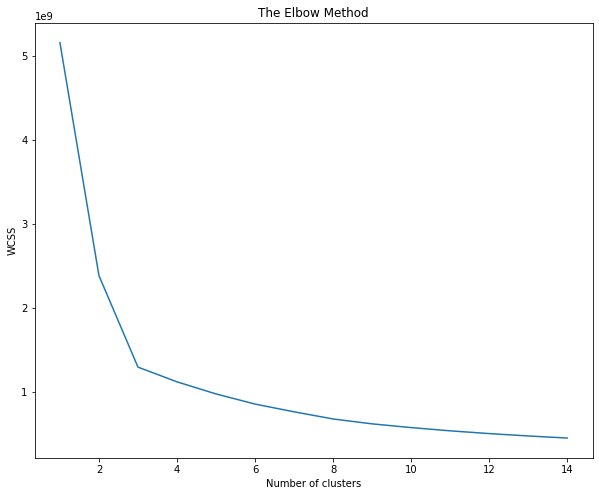

In [13]:
metodoCodo(dataCarlos)

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_

In [15]:
centroids

array([[ 27.04768764,  50.30288116,   0.60868556, 203.76105006,
        141.70781081,  15.88085014,  22.07510999],
       [ 36.36005903, 335.82658585,   3.8187944 , 385.86141834,
        483.88218239,  13.17866362,  20.8741943 ],
       [ 26.00909245,  42.31933084,   0.73434483, 377.88463808,
        446.15854094,  15.89025997,  23.78468286]])

In [16]:
dataTest = [[42.1133346557617, 108,10066828125, 2.83999991416931, 392.260009765625, 495.32666015625, 
             24.7999992370605, 25]] #datos buenos Pot=26.25, linea 28947 dataset limpio
dataTest2 = [[14.3933334350586, 422.374414875, 2.90000009536743, 257.006652832031, 453.553344726563,
              43.0999984741211, 37.5999984741211]] #datos malos Pot=161.87, linea 20707 dataset sin limpiar

In [17]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([1], dtype=int32)

In [20]:
def diagnosticoFallosCarlos(cluster):
    minTempSalidaCarlos = 16.441466 #mean - std
    maxTempSalidaCarlos = 43.095148
    minPotenciaTermicaCarlos = 0 
    maxPotenciaTermicaCarlos = 132
    minCOPCarlos = 3.2656959999999997  #mean - std
    maxCOPCarlos = 4.0215179999999995
    minPotTrafo4 = 0 
    maxPotTrafo4 = 318
    minPotTrafo5 = 0
    maxPotTrafo5 = 348
    minTempExterior = 10
    maxTempExterior = 28
    minTempAmbienteCarlos = 3.73738 #mean - std
    maxTempAmbienteCarlos = 26.429133999999998
    if not ((centroids[cluster][0] > minTempSalidaCarlos) and (centroids[cluster][0] <= maxTempSalidaCarlos)):
        print('Revisar la TEMPERATURA SALIDA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][1] > minPotenciaTermicaCarlos) and (centroids[cluster][1] <= maxPotenciaTermicaCarlos)):
        print('Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][2] > minCOPCarlos) and (centroids[cluster][2] <= maxCOPCarlos)):
        print('Revisar el C_O_P BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][3] > minPotTrafo4) and (centroids[cluster][3] <= maxPotTrafo4)):
        print('Revisar la POTENCIA TRAFO 4.')
    if not ((centroids[cluster][4] > minPotTrafo5) and (centroids[cluster][4] <= maxPotTrafo5)):
        print('Revisar la POTENCIA TRAFO 5.')
    if not ((centroids[cluster][5] > minTempExterior) and (centroids[cluster][5] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')
    if not ((centroids[cluster][6] > minTempAmbienteCarlos) and (centroids[cluster][6] <= maxTempAmbienteCarlos)):
        print('Revisar la TEMPERATURA AMBIENTE BOMBA CALOR CARLOS.')

In [21]:
for cluster in clusters:
    diagnosticoFallosCarlos(cluster)

Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.
Revisar la POTENCIA TRAFO 4.
Revisar la POTENCIA TRAFO 5.


## Potencia Felipe

#### Datos sin limpiar de Felipe.

In [22]:
dataFelipe = data3[['TEMPERATURA SALIDA BOMBA CALOR FELIPE','POTENCIA TERMICA BOMBA CALOR FELIPE', 
                    'C_O_P BOMBA CALOR FELIPE', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
                    'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE']]
dataFelipe.describe()

,TEMPERATURA SALIDA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,C_O_P BOMBA CALOR FELIPE,POTENCIA TRAFO 4,POTENCIA TRAFO 5,TEMPERATURA EXTERIOR,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,27.899720,114.991659,1.360955,318.143167,348.748790,15.083257,20.941832
std,13.937344,145.959139,1.884063,109.800553,173.801800,11.345877,5.262494
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000,0.000000
25%,14.794000,4.233283,0.000000,230.915283,161.846664,6.968000,18.000000
50%,28.799999,24.492828,0.000000,347.246704,404.859985,13.353139,21.309999
75%,41.980000,227.389796,3.273391,408.166656,475.656067,23.717333,24.110001
max,47.889999,592.815954,95.940002,565.151428,854.659973,43.799999,36.257999


In [42]:
20.941832+5.262494

26.204326000000002

#### Datos limpios Felipe.

In [24]:
dataFelipeLimpio = dataLimpia[['TEMPERATURA SALIDA BOMBA CALOR FELIPE','POTENCIA TERMICA BOMBA CALOR FELIPE', 
                               'C_O_P BOMBA CALOR FELIPE', 'POTENCIA TRAFO 4','POTENCIA TRAFO 5',
                               'TEMPERATURA EXTERIOR', 'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE', 
                               'POTENCIA BOMBA CALOR FELIPE']]
dataFelipeLimpio.describe()

,TEMPERATURA SALIDA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,C_O_P BOMBA CALOR FELIPE,POTENCIA TRAFO 4,POTENCIA TRAFO 5,TEMPERATURA EXTERIOR,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,28.203867,118.774293,3.356352,322.380034,351.037831,18.708072,21.307315,33.311907
std,13.629520,144.449122,0.286132,103.480501,171.489812,8.605477,4.521629,45.173629
min,1.166667,0.251979,1.862510,1.417423,32.099998,-1.400000,9.165334,0.040000
25%,15.220000,5.291645,3.356352,240.646667,167.826324,11.900000,18.330000,0.640000
50%,28.799999,29.078821,3.356352,347.246704,404.859985,18.708072,21.307315,0.700000
75%,41.980000,227.389760,3.356352,408.166656,475.656067,23.717333,24.110001,66.543999
max,47.889999,551.289112,4.776893,565.151428,854.659973,43.799999,33.066666,157.706665


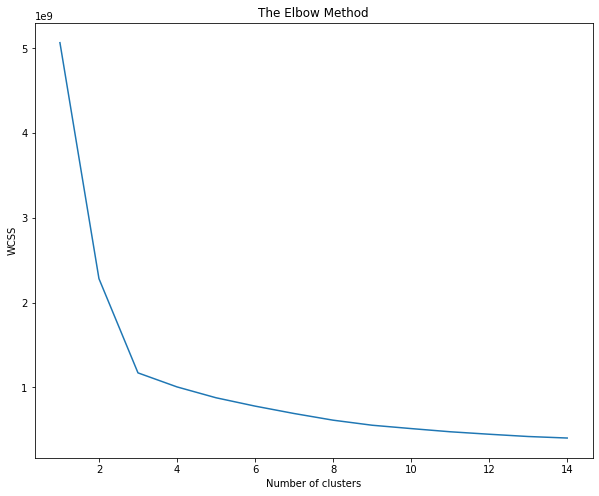

In [25]:
metodoCodo(dataFelipe)

In [27]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataFelipe)
centroids = kmeans.cluster_centers_

In [28]:
centroids

array([[2.60129248e+01, 3.41731719e+01, 4.76465811e-01, 2.02737328e+02,
        1.43439267e+02, 1.59412081e+01, 2.00406493e+01],
       [3.19205182e+01, 3.30861624e+02, 3.43002755e+00, 3.85870472e+02,
        5.06537958e+02, 1.48685353e+01, 2.07714151e+01],
       [2.68228395e+01, 3.73109805e+01, 7.22957862e-01, 3.81114470e+02,
        4.33808360e+02, 1.44063361e+01, 2.19391352e+01]])

In [33]:
dataTest = [[36.1346664428711, 100.541331828125, 3.16389775276184, 195.427001953125, 249.551422119141, 
             13.2784223556519, 17.8899993896484]] #datos buenos Pot=26.5, linea 511 dataset limpio
dataTest2 = [[44.181999206543, 325.26002609375, 3.29401183128357, 401.933013916016, 534.570678710938,
             10.6794900894165, 14.8900003433228]] #datos malos Pot=96.98, linea 35556 dataset sin limpiar

In [34]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([1], dtype=int32)

In [43]:
def diagnosticoFallosFelipe(cluster):
    minTempSalidaFelipe = 14 #mean - std
    maxTempSalidaFelipe = 42
    minPotenciaTermicaFelipe = 0
    maxPotenciaTermicaFelipe = 115
    minCOPFelipe = 0  #mean - std
    maxCOPFelipe = 4
    minPotTrafo4 = 0 
    maxPotTrafo4 = 318
    minPotTrafo5 = 0
    maxPotTrafo5 = 348
    minTempExterior = 4 #mean - std
    maxTempExterior = 27
    minTempAmbienteFelipe = 16 #mean - std
    maxTempAmbienteFelipe = 27
    if not ((centroids[cluster][0] > minTempSalidaFelipe) and (centroids[cluster][0] <= maxTempSalidaFelipe)):
        print('Revisar la TEMPERATURA SALIDA BOMBA CALOR FELIPE.')
    if not ((centroids[cluster][1] > minPotenciaTermicaFelipe) and (centroids[cluster][1] <= maxPotenciaTermicaFelipe)):
        print('Revisar la POTENCIA TERMICA BOMBA CALOR FELIPE.')
    if not ((centroids[cluster][2] > minCOPFelipe) and (centroids[cluster][2] <= maxCOPFelipe)):
        print('Revisar el C_O_P BOMBA CALOR FELIPE.')
    if not ((centroids[cluster][3] > minPotTrafo4) and (centroids[cluster][3] <= maxPotTrafo4)):
        print('Revisar la POTENCIA TRAFO 4.')
    if not ((centroids[cluster][4] > minPotTrafo5) and (centroids[cluster][4] <= maxPotTrafo5)):
        print('Revisar la POTENCIA TRAFO 5.')
    if not ((centroids[cluster][5] > minTempExterior) and (centroids[cluster][5] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')
    if not ((centroids[cluster][6] > minTempAmbienteFelipe) and (centroids[cluster][6] <= maxTempAmbienteFelipe)):
        print('Revisar la TEMPERATURA AMBIENTE BOMBA CALOR FELIPE.')

In [44]:
for cluster in clusters:
    diagnosticoFallosFelipe(cluster)

Revisar la POTENCIA TERMICA BOMBA CALOR FELIPE.
Revisar la POTENCIA TRAFO 4.
Revisar la POTENCIA TRAFO 5.


## C_O_P Grupo Frío 1

#### Datos sin limpiar Grupo Frío 1.

In [45]:
dataFrio1 = data3[['POTENCIA TERMICA GRUPO FRIO 1', 'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 1',
                   'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
                   'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1', 'TEMPERATURA EXTERIOR']]
dataFrio1.describe()

,POTENCIA TERMICA GRUPO FRIO 1,ENTRADA AGUA A TORRE 1,SALIDA AGUA TORRE 1,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,7.928500e+04,79285.000000
mean,95.445736,17.066145,16.367464,318.143167,348.748790,767.229633,8.943993,8.206856e+04,15.083257
std,117.950837,12.605750,12.040748,109.800553,173.801800,308.224618,7.620269,1.014195e+05,11.345877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.400000
25%,0.000000,0.000000,0.000000,230.915283,161.846664,459.953339,0.000000,0.000000e+00,6.968000
50%,22.504057,21.688000,22.430000,347.246704,404.859985,866.000549,12.690000,1.935001e+04,13.353139
75%,172.589200,28.128000,26.320000,408.166656,475.656067,1016.214844,14.010000,1.484000e+05,23.717333
max,2373.624850,69.329330,65.342667,565.151428,854.659973,1569.602173,102.169998,2.040950e+06,43.799999


#### Datos limpios Grupo Frío 1. 

In [46]:
dataFrio1Limpio = dataLimpia[['POTENCIA TERMICA GRUPO FRIO 1', 'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 1',
                              'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
                              'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1', 'TEMPERATURA EXTERIOR', 
                              'POTENCIA GRUPO FRÍO 1']]
dataFrio1Limpio.describe()

,POTENCIA TERMICA GRUPO FRIO 1,ENTRADA AGUA A TORRE 1,SALIDA AGUA TORRE 1,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,TEMPERATURA EXTERIOR,POTENCIA GRUPO FRÍO 1
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,129.067983,25.257636,24.750160,322.380034,351.037831,768.994873,14.005693,110978.489599,18.708072,20.752592
std,103.000351,3.975536,2.361339,103.480501,171.489812,306.019694,1.202846,88564.360418,8.605477,26.858775
min,0.465200,10.120000,16.510000,1.417423,32.099998,7.882583,9.790667,399.999603,-1.400000,0.006667
25%,27.679411,24.040001,24.719999,240.646667,167.826324,462.619995,13.480000,23800.009766,11.900000,0.100000
50%,129.067983,25.257636,24.750160,347.246704,404.859985,866.000549,14.005693,110978.489599,18.708072,0.100000
75%,172.589200,28.043333,26.309999,408.166656,475.656067,1016.214844,14.010000,148400.000000,23.717333,38.900002
max,523.291850,40.661999,32.393333,565.151428,854.659973,1569.602173,18.540001,449950.000000,43.799999,95.966667


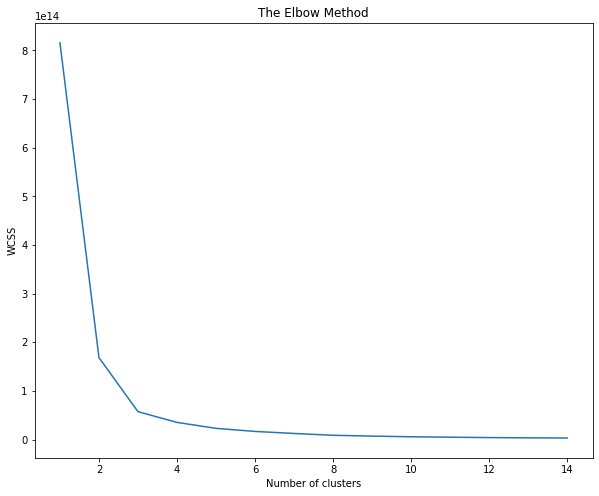

In [47]:
metodoCodo(dataFrio1)

In [48]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataFrio1)
centroids = kmeans.cluster_centers_

In [49]:
centroids

array([[1.13852501e+01, 1.36280976e+01, 1.38831998e+01, 2.97530234e+02,
        3.05777099e+02, 7.02307011e+02, 7.89414821e+00, 9.78955294e+03,
        1.45292588e+01],
       [3.11108825e+02, 2.28201132e+01, 1.99025945e+01, 3.61142395e+02,
        4.65396664e+02, 9.26889220e+02, 1.04593588e+01, 2.67505438e+05,
        1.97586654e+01],
       [1.58464952e+02, 2.18570583e+01, 2.02786503e+01, 3.40731182e+02,
        3.76343997e+02, 8.20884653e+02, 1.05813846e+01, 1.36255333e+05,
        1.31498014e+01]])

In [54]:
dataTest = [[97.5757, 22.3726673126221, 20.7133331298828, 159.100006103516, 117.339996337891,
             343.5, 15.2919998168945, 83900, 18.7080717440297]] #datos buenos Pot=18.88, linea 43224 dataset limpio
dataTest2 = [[205.21134999999998, 30.0100002288818, 26.4953327178955, 395.249114990234, 358.912963867188, 
              925.33837890625, 13.0600004196167, 176450, 10.9633331298828]] #datos malos Pot=49.89, linea 65547 dataset sin limpiar

In [55]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([2], dtype=int32)

In [65]:
def diagnosticoFallosFrio1(cluster):
    minPotenciaTermicaFrio1 = 0
    maxPotenciaTermicaFrio1 = 96
    minEntradaAgua1 = 5 #mean - std
    maxEntradaAgua1 = 30
    minSalidaAgua1 = 4 #mean - std
    maxSalidaAgua1 = 28
    minPotTrafo4 = 0
    maxPotTrafo4 = 318
    minPotTrafo5 = 0
    maxPotTrafo5 = 348
    minPotMediaConectada = 459 #mean - std
    maxPotMediaConectada = 1075
    minControlFrio = 2 #mean - std
    maxControlFrio = 17
    minKigoFrigorias1 = 0
    maxKigoFrigorias1 = 83000
    minTempExterior = 4 #mean - std
    maxTempExterior = 27
    if not ((centroids[cluster][0] > minPotenciaTermicaFrio1) and (centroids[cluster][0] <= maxPotenciaTermicaFrio1)):
        print('Revisar la POTENCIA TERMICA GRUPO FRIO 1.')
    if not ((centroids[cluster][1] > minEntradaAgua1) and (centroids[cluster][1] <= maxEntradaAgua1)):
        print('Revisar la ENTRADA AGUA A TORRE 1.')
    if not ((centroids[cluster][2] > minSalidaAgua1) and (centroids[cluster][2] <= maxSalidaAgua1)):
        print('Revisar la SALIDA AGUA TORRE 1.')
    if not ((centroids[cluster][3] > minPotTrafo4) and (centroids[cluster][3] <= maxPotTrafo4)):
        print('Revisar la POTENCIA TRAFO 4.')
    if not ((centroids[cluster][4] > minPotTrafo5) and (centroids[cluster][4] <= maxPotTrafo5)):
        print('Revisar la POTENCIA TRAFO 5.')
    if not ((centroids[cluster][5] > minPotMediaConectada) and (centroids[cluster][5] <= maxPotMediaConectada)):
        print('Revisar la POTENCIA MEDIA CONECTADA.')
    if not ((centroids[cluster][6] > minControlFrio) and (centroids[cluster][6] <= maxControlFrio)):
        print('Revisar el CONTROL FRÍO.')
    if not ((centroids[cluster][7] > minKigoFrigorias1) and (centroids[cluster][7] <= maxKigoFrigorias1)):
        print('Revisar las KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1.')
    if not ((centroids[cluster][8] > minTempExterior) and (centroids[cluster][8] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')

In [66]:
for cluster in clusters:
    diagnosticoFallosFrio1(cluster)

Revisar la POTENCIA TERMICA GRUPO FRIO 1.
Revisar la POTENCIA TRAFO 4.
Revisar la POTENCIA TRAFO 5.
Revisar la POTENCIA MEDIA CONECTADA.
Revisar las KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1.


## C_O_P Grupo Frío 2

#### Datos sin limpiar Grupo Frío 2.

In [76]:
dataFrio2 = data3[['POTENCIA TERMICA GRUPO FRIO 2', 'ENTRADA AGUA A TORRE 2', 'SALIDA AGUA TORRE 2',
                   'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
                   'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2', 'TEMPERATURA EXTERIOR']]
dataFrio2.describe()

,POTENCIA TERMICA GRUPO FRIO 2,ENTRADA AGUA A TORRE 2,SALIDA AGUA TORRE 2,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,97.791279,18.100677,16.524280,318.143167,348.748790,767.229633,8.943993,84085.364562,15.083257
std,117.645826,13.034548,11.966579,109.800553,173.801800,308.224618,7.620269,101157.202135,11.345877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000
25%,0.000000,0.000000,0.000000,230.915283,161.846664,459.953339,0.000000,0.000000,6.968000
50%,28.784257,24.990000,23.780001,347.246704,404.859985,866.000549,12.690000,24750.005859,13.353139
75%,165.611200,28.856667,26.073999,408.166656,475.656067,1016.214844,14.010000,142400.000000,23.717333
max,412.806886,51.889999,52.113335,565.151428,854.659973,1569.602173,102.169998,354950.031250,43.799999


#### Datos limpios Grupo Frío 2. 

In [68]:
dataFrio2Limpio = dataLimpia[['POTENCIA TERMICA GRUPO FRIO 2', 'ENTRADA AGUA A TORRE 2', 'SALIDA AGUA TORRE 2',
                              'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA', 'CONTROL FRÍO',
                              'KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2', 'TEMPERATURA EXTERIOR',
                              'POTENCIA GRUPO FRÍO 2']]
dataFrio2Limpio.describe()

,POTENCIA TERMICA GRUPO FRIO 2,ENTRADA AGUA A TORRE 2,SALIDA AGUA TORRE 2,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,TEMPERATURA EXTERIOR,POTENCIA GRUPO FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,190.173695,27.168530,25.248399,322.380034,351.037831,768.994873,14.005693,163519.944304,18.708072,27.399312
std,69.326992,2.810056,1.407532,103.480501,171.489812,306.019694,1.202846,59610.483157,8.605477,28.573689
min,0.523345,17.639999,20.126667,1.417423,32.099998,7.882583,9.790667,449.996002,-1.400000,0.006667
25%,159.738050,26.080000,25.223333,240.646667,167.826324,462.619995,13.480000,137350.000000,11.900000,0.100000
50%,190.173695,27.168530,25.248399,347.246704,404.859985,866.000549,14.005693,163519.944304,18.708072,26.000000
75%,190.173695,28.845333,26.056667,408.166656,475.656067,1016.214844,14.010000,163519.944304,23.717333,52.560001
max,412.806886,36.698002,29.926666,565.151428,854.659973,1569.602173,18.540001,354950.031250,43.799999,93.536667


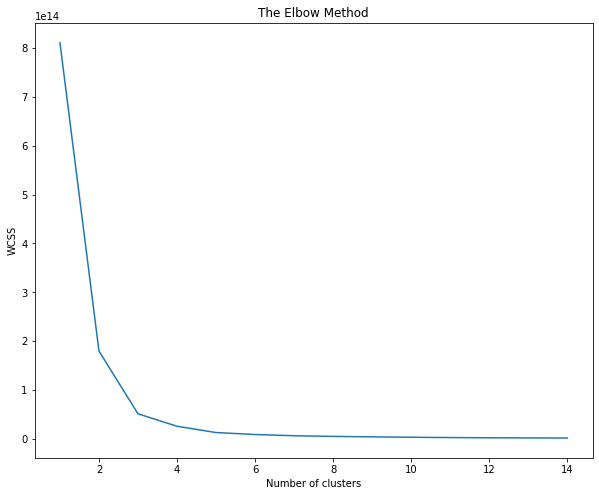

In [69]:
metodoCodo(dataFrio2)

In [70]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dataFrio2)
centroids = kmeans.cluster_centers_

In [71]:
centroids

array([[1.92279724e+00, 1.73336218e+01, 1.64819074e+01, 2.78040124e+02,
        2.68020125e+02, 6.41189723e+02, 8.93336305e+00, 1.65330803e+03,
        1.31901532e+01],
       [2.97204834e+02, 2.16927899e+01, 1.92700619e+01, 3.77258506e+02,
        4.84938491e+02, 9.62646036e+02, 1.04788760e+01, 2.55550158e+05,
        2.03466141e+01],
       [1.33761620e+02, 1.33827618e+01, 1.47029474e+01, 3.49990011e+02,
        4.00974907e+02, 8.60668926e+02, 7.90219919e+00, 1.15014290e+05,
        1.48771990e+01]])

In [74]:
dataTest = [[100.30875, 27.1685302072255, 25.2483993585659, 468.566680908203, 519.820007324219,
             1114.53332519531, 14.0056927205735, 86250, 6.83333349227905]] #datos buenos Pot=25.29, linea 1776 dataset limpio
dataTest2 = [[160.7266, 51.7133331298828, 48.1399993896484, 419.615478515625, 516.896789550781,
              1079.24963378906, 13.8000001907349, 138200, 7.01000022888184]] #datos malos Pot=93.54, linea 77609 dataset sin limpiar

In [75]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([2], dtype=int32)

In [88]:
def diagnosticoFallosFrio2(cluster):
    minPotenciaTermicaFrio2 = 0
    maxPotenciaTermicaFrio2 = 98
    minEntradaAgua2 = 5 #mean - std
    maxEntradaAgua2 = 31
    minSalidaAgua2 = 5 #mean - std
    maxSalidaAgua2 = 29
    minPotTrafo4 = 0
    maxPotTrafo4 = 318
    minPotTrafo5 = 0
    maxPotTrafo5 = 348
    minPotMediaConectada = 459 #mean - std
    maxPotMediaConectada = 1075
    minControlFrio = 2 #mean - std
    maxControlFrio = 17
    minKigoFrigorias2 = 0
    maxKigoFrigorias2 = 84085
    minTempExterior = 4 #mean - std
    maxTempExterior = 27
    if not ((centroids[cluster][0] > minPotenciaTermicaFrio2) and (centroids[cluster][0] <= maxPotenciaTermicaFrio2)):
        print('Revisar la POTENCIA TERMICA GRUPO FRIO 2.')
    if not ((centroids[cluster][1] > minEntradaAgua2) and (centroids[cluster][1] <= maxEntradaAgua2)):
        print('Revisar la ENTRADA AGUA A TORRE 2.')
    if not ((centroids[cluster][2] > minSalidaAgua2) and (centroids[cluster][2] <= maxSalidaAgua2)):
        print('Revisar la SALIDA AGUA TORRE 2.')
    if not ((centroids[cluster][3] > minPotTrafo4) and (centroids[cluster][3] <= maxPotTrafo4)):
        print('Revisar la POTENCIA TRAFO 4.')
    if not ((centroids[cluster][4] > minPotTrafo5) and (centroids[cluster][4] <= maxPotTrafo5)):
        print('Revisar la POTENCIA TRAFO 5.')
    if not ((centroids[cluster][5] > minPotMediaConectada) and (centroids[cluster][5] <= maxPotMediaConectada)):
        print('Revisar la POTENCIA MEDIA CONECTADA.')
    if not ((centroids[cluster][6] > minControlFrio) and (centroids[cluster][6] <= maxControlFrio)):
        print('Revisar el CONTROL FRÍO.')
    if not ((centroids[cluster][7] > minKigoFrigorias2) and (centroids[cluster][7] <= maxKigoFrigorias2)):
        print('Revisar las KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2.')
    if not ((centroids[cluster][8] > minTempExterior) and (centroids[cluster][8] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')

In [89]:
for cluster in clusters:
    diagnosticoFallosFrio2(cluster)

Revisar la POTENCIA TERMICA GRUPO FRIO 2.
Revisar la POTENCIA TRAFO 4.
Revisar la POTENCIA TRAFO 5.
Revisar las KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2.
